# Load beste modell og prediker en sekvens lengde frem i tid.

In [1]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
glob.glob('/home/hanna/EX3_Results_AR/*')

['/home/hanna/EX3_Results_AR/AR-B-5',
 '/home/hanna/EX3_Results_AR/AR-T-5',
 '/home/hanna/EX3_Results_AR/AR-S-5',
 '/home/hanna/EX3_Results_AR/AR-B-S-5',
 '/home/hanna/EX3_Results_AR/AR-T-S-5',
 '/home/hanna/EX3_Results_AR/AR-5']

In [3]:
#glob.glob('/home/hanna/EX3_Results_AR/*performance*')

# Printing status regridding.

In [4]:
python_path = '/home/hanna/MS-thesis/python_figs/status_AR/'

for path in glob.glob('/home/hanna/EX3_Results_AR/*'): 
    print(path)
    print(len(glob.glob(path+'/*performance*TR*L1*')))

/home/hanna/EX3_Results_AR/AR-B-5
13041
/home/hanna/EX3_Results_AR/AR-T-5
13041
/home/hanna/EX3_Results_AR/AR-S-5
13041
/home/hanna/EX3_Results_AR/AR-B-S-5
13041
/home/hanna/EX3_Results_AR/AR-T-S-5
13041
/home/hanna/EX3_Results_AR/AR-5
13041


# Load weights 

In [4]:
files = glob.glob('/home/hanna/EX3_Results_AR/AR-B-5/*weights*AR*L1*') 
data = xr.open_mfdataset(files, combine='by_coords')

In [5]:
len(files)

13041

In [6]:
files[0]

'/home/hanna/EX3_Results_AR/AR-B-5/weights_AR-B-5-L1_-0.25_30.0.nc'

In [7]:
#data = xr.open_mfdataset(files, combine='by_coords')

In [8]:
data

,Array,Chunk
Bytes,625.97 kB,48 B
Shape,"(161, 81, 6)","(1, 1, 6)"
Count,78246 Tasks,13041 Chunks
Type,float64,numpy.ndarray


In [9]:
data['latitude'] = data.latitude.values.astype(float)
data['longitude'] = data.longitude.values.astype(float)
data = data.sortby('longitude')
data = data.sortby('latitude')

# Load Sequence 

In [10]:
lh_files = glob.glob('/home/hanna/lagrings/ERA5_monthly/*2014*01*.nc')
input_data = xr.open_mfdataset(lh_files, combine='by_coords').isel(time=slice(0, 24*4))

In [13]:
longitude = data.longitude.values
latitude = data.latitude.values

In [11]:
hmm = data.coeffs

In [12]:
hmm

,Array,Chunk
Bytes,625.97 kB,48 B
Shape,"(161, 81, 6)","(1, 1, 6)"
Count,91287 Tasks,13041 Chunks
Type,float64,numpy.ndarray


In [13]:
#hmm.isel(weights=0).plot()

In [14]:
#input_data.isel(time=0)['q'].plot()

In [35]:
#q_w = hmm.isel(weights=0)

In [36]:
#prod=input_data.isel(time=0)['q']*hmm.isel(weights=0)

In [ ]:
#prod

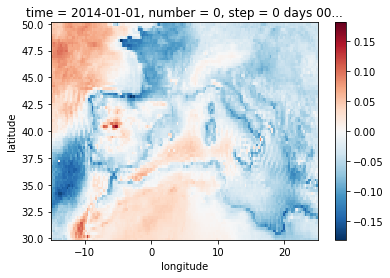

In [37]:
#prod.plot()

In [39]:
# START make first prediction 

In [15]:
#input_data.isel(time=0)['tcc'].plot()

# mistenker det blir feil når hentes ut og multipliseres
# sjekk min og max?

In [64]:
#subset = input_data.sel(latitude = slice(min(latitude), max(latitude)))

In [67]:
#coefs = data.coeffs.values

In [ ]:
#prev_tcc.values

In [34]:
input_data

<xarray.Dataset>
Dimensions:        (latitude: 81, longitude: 161, time: 96)
Coordinates:
  * latitude       (latitude) float64 30.0 30.25 30.5 30.75 ... 49.5 49.75 50.0
  * time           (time) datetime64[ns] 2014-01-01 ... 2014-01-04T23:00:00
  * longitude      (longitude) float64 -15.0 -14.75 -14.5 ... 24.5 24.75 25.0
    number         int64 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  int64 1000
    valid_time     (time) datetime64[ns] dask.array<chunksize=(96,), meta=np.ndarray>
    surface        int64 0
Data variables:
    tcc            (time, latitude, longitude) float64 dask.array<chunksize=(96, 81, 161), meta=np.ndarray>
    nr_nans        (time, latitude, longitude) float64 dask.array<chunksize=(96, 81, 161), meta=np.ndarray>
    q              (time, latitude, longitude) float32 dask.array<chunksize=(96, 81, 161), meta=np.ndarray>
    r              (time, latitude, longitude) float32 dask.array<chunksize=(96, 81, 161), meta=np.ndarray>
    sp             (time, latitude, longitude) float32 dask.array<chunksize=(96, 81, 161), meta=np.ndarray>
    t2m            (time, latitude, longitude) float32 dask.array<chunksize=(96, 81, 161), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-02-20T09:59:12 GRIB to CDM+CF via cfgrib-0....

In [11]:
store_prediction = np.zeros((24, 161, 81))
coefs = data.coeffs.values

q_idx   = 0
t2m_idx = 1
r_idx   = 2
sp_idx  = 3
bias_idx = 4
tcc_idx = 5
print('restart')

for i in range(24):
    sub = input_data.isel(time=i)
    # HARDCODED DIFFERENT FOR ALL MODELS.
    Q = sub.q.values.T * coefs[:, :, 0] 
    print(Q.shape)
    T2M = sub.t2m.values.T * coefs[:, :, 1] 
    R = sub.r.values.T * coefs[:, :, 2] 
    SP = sub.sp.values.T * coefs[:, :, 3]
    BIAS = np.ones(sub.sp.values.T.shape) * coefs[:, :, 4]

    #subset = input_data.isel(time=i)
    
    #if i==0:
    tcc = sub.tcc.values.T * coefs[:, :, 5]
    #prev_tcc = subset['tcc']*hmm.isel(weights=tcc_idx)
    # else:
    #     tcc = tcc*coefs[:, :, 5]
        
    tcc = np.nansum([Q, T2M, R, SP, BIAS, tcc], axis = 0 )   
    #print(tcc.shape)
    #print('computing predicton {}'.format(i))
    #prediction = (subset['q']*hmm.isel(weights=q_idx)+subset['r']*hmm.isel(weights=r_idx)+
    #hmm.isel(weights=bias_idx)+subset['sp']*hmm.isel(weights=sp_idx)+subset['t2m']*hmm.isel(weights=t2m_idx) + prev_tcc)
    #prev_tcc = prediction
    #print(prev_tcc.weights)
    #store_prediction.append(prev_tcc)
    #print(np.nanmax(tcc))
    #print(' ')
    
    #prev_tcc = np.nansum( np.stack([Q, T2M, R, SP, BIAS, tcc]), axis=0)
    store_prediction[i, :, :] = tcc
    print('added_data {}/24'.format(i))
    


restart
(161, 81)
added_data 0/24
(161, 81)
added_data 1/24
(161, 81)
added_data 2/24
(161, 81)
added_data 3/24
(161, 81)
added_data 4/24
(161, 81)
added_data 5/24
(161, 81)
added_data 6/24
(161, 81)
added_data 7/24
(161, 81)
added_data 8/24
(161, 81)
added_data 9/24
(161, 81)
added_data 10/24
(161, 81)
added_data 11/24
(161, 81)
added_data 12/24
(161, 81)
added_data 13/24
(161, 81)
added_data 14/24
(161, 81)
added_data 15/24
(161, 81)
added_data 16/24
(161, 81)
added_data 17/24
(161, 81)
added_data 18/24
(161, 81)
added_data 19/24
(161, 81)
added_data 20/24
(161, 81)
added_data 21/24
(161, 81)
added_data 22/24
(161, 81)
added_data 23/24


In [14]:
data_dict = {'tcc': ([ 'sequence_length','longitude', 'latitude',], store_prediction)}
ds = xr.Dataset(data_dict,
         coords={'longitude': (['longitude'], longitude),
                 'latitude': (['latitude'], latitude),
                 'sequence_length': (['sequence_length'], np.arange(24))
                })
ds = ds.tcc.where(tcc < 10)


ds['date_seq']  = '2014-01-01'
ds.to_netcdf(os.path.join('/home/hanna/MS-thesis/python_figs/','brand_new_prediction3_era5_as_input.nc')) # obs file can't be opened anywhere.

In [ ]:
#data.coeffs.where(data.coeffs<10).values

In [19]:
ds[]

<xarray.Dataset>
Dimensions:          (latitude: 81, longitude: 161, sequence_length: 24)
Coordinates:
  * longitude        (longitude) float64 -15.0 -14.75 -14.5 ... 24.5 24.75 25.0
  * latitude         (latitude) float64 30.0 30.25 30.5 ... 49.5 49.75 50.0
  * sequence_length  (sequence_length) int64 0 1 2 3 4 5 6 ... 18 19 20 21 22 23
Data variables:
    tcc              (sequence_length, longitude, latitude) float64 0.1632 ... 0.7624
    date_seq         <U10 '2014-01-01'

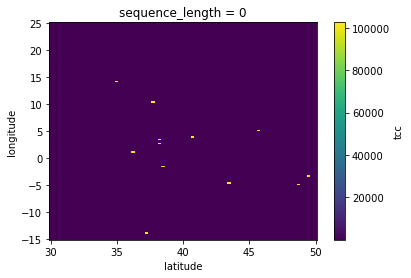

In [23]:
ds['tcc'].fillna(tcc>10).isel(sequence_length=0).plot()

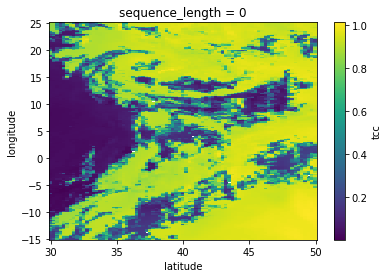

In [26]:
ds.tcc.where(tcc < 10).isel(sequence_length=0).plot()

In [28]:
import seaborn as sns

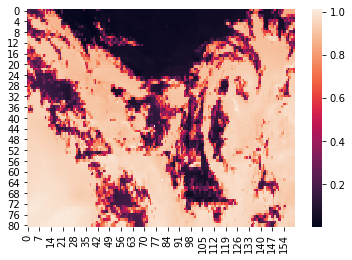

In [29]:
sns.heatmap(ds.tcc.where(tcc < 10).isel(sequence_length=0).values.transpose() )

In [61]:
f = [r.drop_vars(names=['number', 'isobaricInhPa', 'surface', 'step', 'valid_time', 'surface', 'time'], errors ='ignore') for r in store_prediction]

In [64]:
ds = xr.concat(f, dim=np.arange(24))#, 'time'], coords = 'minimal',compat='override')

In [65]:
ds.concat_dim

,Array,Chunk
Bytes,2.50 MB,8 B
Shape,"(24, 81, 161)","(1, 1, 1)"
Count,6233714 Tasks,312984 Chunks
Type,float64,numpy.ndarray


In [66]:
data_dict = {'tcc': ([ 'sequence_length','longitude', 'latitude',], prediction)}

ds = xr.Dataset(data_dict,
         coords={'longitude': (['longitude'], longitude),
                 'latitude': (['latitude'], latitude),
                 'sequence_length': (['sequence_length'], np.arange(24))
                })

ds['date_seq']  = '2014-01-01'
ds.to_netcdf(os.path.join('/home/hanna/MS-thesis/python_figs/','brand_new_prediction.nc')) # obs file can't be opened anywhere.

KeyboardInterrupt: 

In [ ]:
ds

In [78]:
xr.open_dataset(os.path.join('/home/hanna/MS-thesis/python_figs/','prediction.nc')).tcc.values.shape

(161, 55, 24)

# Compute statistics 

In [82]:
data.weights.values

array(['q', 't2m', 'r', 'sp', 'bias', 'O1'], dtype=object)

In [81]:
coefs.shape

(161, 55, 6)

In [90]:
store = {}
for i, key in enumerate(data.weights.values):
    portion = coefs[:, :, i]
    if key == 'O1':
        key='L1'
    store[key] = np.array([ np.nanmin(portion), np.nanmax(portion), np.nanmean(portion), np.nanmedian(portion), np.nanstd(portion)  ])

In [91]:
import pandas as pd

In [96]:
y_ticklabels = ['min', 'max', 'mean', 'median', 'std']

In [92]:
df = pd.DataFrame.from_dict(store)

In [93]:
import seaborn as sns

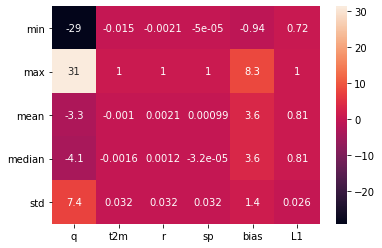

In [99]:
df = pd.DataFrame.from_dict(store)
sns.heatmap(df, annot = True, yticklabels=y_ticklabels)
plt.yticks(rotation=0) 
plt.savefig('/home/hanna/MS-thesis/python_figs/test_weights_heatmap.png')

# Computing statistical properties of weights 

In [ ]:
new_arr = arr.reshape(81*161,len(coeffs))

In [25]:
import numpy as np

In [29]:
data.coeffs.values.shape

(5, 5)

In [39]:
fil = '/home/hannasv/results_ar/AR-B-5/performance_AR-B-5-L0_-0.25_30.0.nc'

In [42]:
fil.split('_')[-3]

'AR-B-5-L0'

In [30]:
np.min(data.coeffs.values, axis = 0)

array([ 5.55571986e+00, -5.90004434e-04, -1.54117571e-04,  1.68034936e-06,
        8.29468132e-01])

In [31]:
np.max(data.coeffs.values, axis = 0)

array([ 5.94396437e+00, -4.94187863e-04, -8.67205655e-05,  1.99474107e-06,
        8.31330878e-01])

In [32]:
np.mean(data.coeffs.values, axis = 0)

array([ 5.68424619e+00, -5.45828343e-04, -1.24306789e-04,  1.83782549e-06,
        8.30389708e-01])

In [33]:
np.std(data.coeffs.values, axis = 0)

array([1.37063709e-01, 3.65313719e-05, 2.59208068e-05, 1.16662932e-07,
       7.84209520e-04])

In [34]:
np.median(data.coeffs.values, axis = 0)

array([ 5.65631008e+00, -5.58481981e-04, -1.33213268e-04,  1.86749991e-06,
        8.30533713e-01])

In [ ]:
# Autoregressive models 
for i in range(6):
    files = len(glob.glob(path+'/performance*AR*o{}*'.format(i))) 
    title = files[0].split('_')[-3]
    data = xr.open_mfdataset(files, combine='by_coords')
    ax = sns.heatmap(data['mae_test'].values)
    ax.set_title(title)
    plt.savefig(python_path+title+'_{}.png'.format(var))

# Traditional models 
for i in range(1, 6):
    files = len(glob.glob(path+'/performance*TR*o{}*'.format(i))) 
    title = files[0].split('_')[-3]
    data = xr.open_mfdataset(files, combine='by_coords')
    ax = sns.heatmap(data['mae_test'].values)
    ax.set_ylabel('Longitude')
    ax.set_xlabel('Latitude')
    ax.set_title(title)
    plt.savefig(python_path+title+'_{}.png'.format(var))

1170
54956
1170
1170
1170
1170


In [12]:
files = glob.glob('/home/hanna/EX3_Results_AR/AR-B-5/performance*AR*o4*')

In [13]:
len(files) # should be 13 k

2498

In [32]:
title= 'AR-B-5-o4'

Text(0.5, 15.0, 'Latitude')

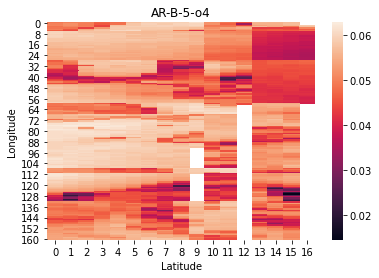

In [37]:
data = xr.open_mfdataset(files, combine='by_coords')
ax = sns.heatmap(data['mae_test'].values)
ax.set_title(title)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')

In [38]:
import seaborn as sns

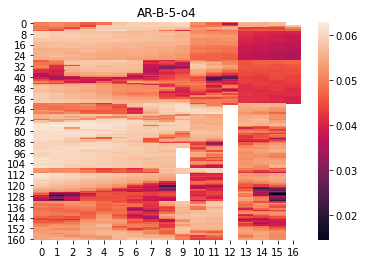

In [39]:
python_path = '/home/hanna/MS-thesis/python_figs/status_AR/'
ax = sns.heatmap(data['mae_test'].values)
ax.set_title(title)

plt.savefig(python_path+title+'.png')

In [36]:
data['mae_test'].plot()

TypeError: Plotting requires coordinates to be numeric or dates of type np.datetime64, datetime.datetime, cftime.datetime or pd.Interval.

# Hvis dette ikke funker 

In [ ]:
# Make one plot for each, use the mae code.

# PLot to generate status message --> maybee create folders so these plots are easy to regenerate.